In [3]:
# let us import the required libraries(modules)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100);

In [4]:
# let us load the dataset into dataframe

df = pd.read_csv('telco_churn.csv')

In [5]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
# let us do the routine structure check

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [11]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ''

In [15]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [16]:
help(pd.to_numeric)

Help on function to_numeric in module pandas.core.tools.numeric:

to_numeric(arg, errors='raise', downcast=None)
    Convert argument to a numeric type.
    
    The default return dtype is `float64` or `int64`
    depending on the data supplied. Use the `downcast` parameter
    to obtain other dtypes.
    
    Please note that precision loss may occur if really large numbers
    are passed in. Due to the internal limitations of `ndarray`, if
    numbers smaller than `-9223372036854775808` (np.iinfo(np.int64).min)
    or larger than `18446744073709551615` (np.iinfo(np.uint64).max) are
    passed in, it is very likely they will be converted to float so that
    they can stored in an `ndarray`. These warnings apply similarly to
    `Series` since it internally leverages `ndarray`.
    
    Parameters
    ----------
    arg : scalar, list, tuple, 1-d array, or Series
        Argument to be converted.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then in

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df['Churn'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<AxesSubplot:>

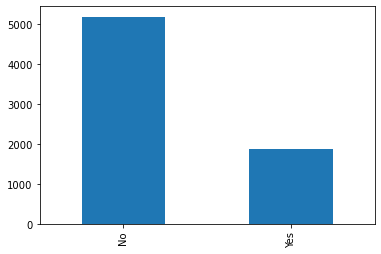

In [22]:
# let us make it a lil apealing

df['Churn'].value_counts().plot(kind='bar')

### Analysis 

#### Univariate 
    - Categorical
    - Continous


#### Bivariate

    - Conti-Conti
    - Cate-Conti
    - Cate-Cate

In [25]:
# let us partition the data (divide the dataframe) 

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df_1= df[df['Churn']=='Yes']
df_0= df[df['Churn']=='No']

In [28]:
# churn
df_1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [29]:
# non-churn

df_0.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [31]:
## Univariate Analysis - Continous 


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
import warnings
warnings.filterwarnings("ignore")

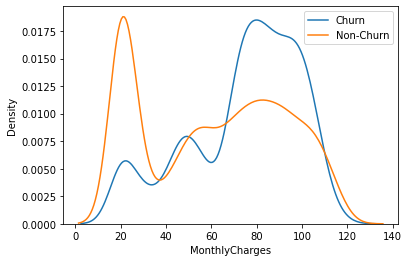

In [35]:
sns.distplot(df_1['MonthlyCharges'],hist=False,label='Churn')
sns.distplot(df_0['MonthlyCharges'],hist=False,label='Non-Churn')
plt.legend()
plt.show()

In [36]:
## Univariate Categorical Analysis

# we will observe the churn trend based on contracttype

In [37]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

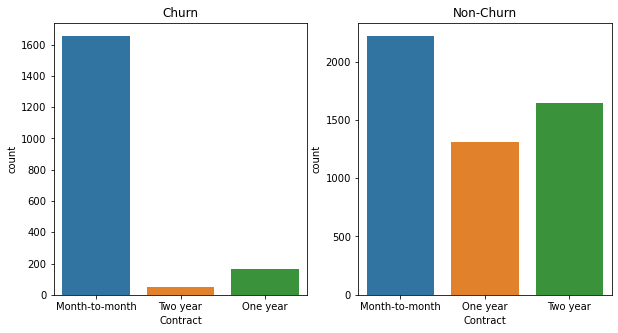

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Churn')
sns.countplot(x='Contract',data=df_1)


plt.subplot(1,2,2)
plt.title('Non-Churn')
sns.countplot(x='Contract',data=df_0)


plt.show()

In [ ]:
# Bivariate Analysis | Churn -> MonthlyCharges vs Tenure

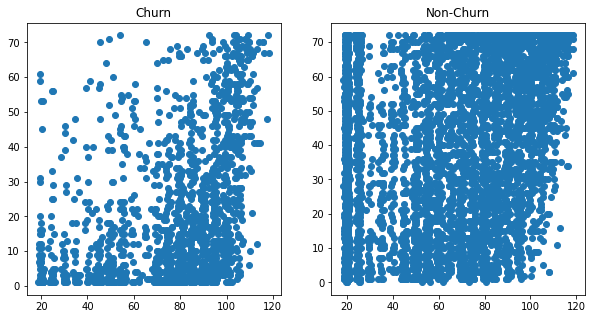

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Churn')
plt.scatter(df_1['MonthlyCharges'],df_1['tenure'])

plt.subplot(1,2,2)
plt.title('Non-Churn')
plt.scatter(df_0['MonthlyCharges'],df_0['tenure'])
plt.show()


In [45]:
# Bivariate Cate-Conti

# Contract Type vs MonthlyCharges

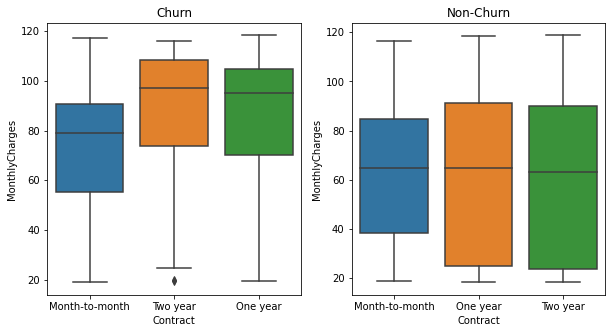

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Churn')
sns.boxplot(x='Contract',y='MonthlyCharges',data=df_1)

plt.subplot(1,2,2)
plt.title('Non-Churn')
sns.boxplot(x='Contract',y='MonthlyCharges',data=df_0)
plt.show()



In [ ]:
# Bivariate Cate Cate

In [ ]:
# does gender plays any role in churning?

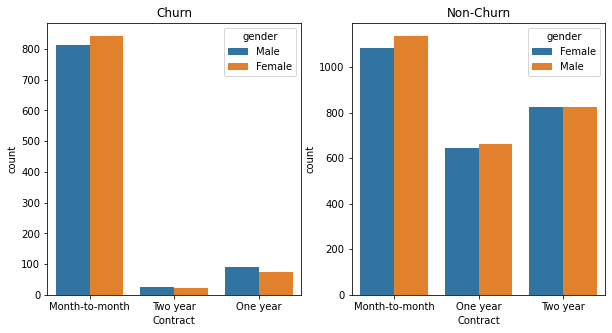

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Churn')
sns.countplot(x='Contract',hue='gender',data=df_1)


plt.subplot(1,2,2)
plt.title('Non-Churn')
sns.countplot(x='Contract',hue='gender',data=df_0)


plt.show()

In [49]:
# Correlation Matrix


In [53]:
marks={
    'English':[45,67,83,34,23],
    'Science':[65,76,45,65,44],
    'Maths':[65,67,57,45,56]
}

In [54]:
df = pd.DataFrame(marks,columns=['English','Science','Maths'])

In [55]:
df

,English,Science,Maths
0,45,65,65
1,67,76,67
2,83,45,57
3,34,65,45
4,23,44,56


In [57]:
df.corr()

,English,Science,Maths
English,1.000000,0.077581,0.407332
Science,0.077581,1.000000,0.330207
Maths,0.407332,0.330207,1.000000


In [ ]:
# equals 1 i.e perfect positive relation
# >0 positive relation
# <0 negative relation

In [58]:
corrMatrix= df.corr()

In [59]:
corrMatrix

,English,Science,Maths
English,1.000000,0.077581,0.407332
Science,0.077581,1.000000,0.330207
Maths,0.407332,0.330207,1.000000


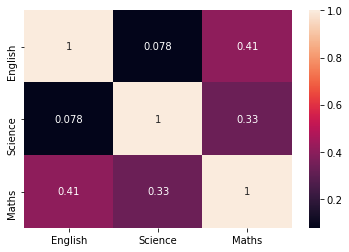

In [62]:
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [63]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rajan-chettri/telecom-customer-churn-case-study-v2" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rajan-chettri/telecom-customer-churn-case-study-v2


'https://jovian.ai/rajan-chettri/telecom-customer-churn-case-study-v2'